# Implement Stencil Operators for the Discrete Laplacian

In [1]:
import numpy  as np
from src_dir import GMRES, matmul_a, resid, laplace_1d, mk_laplace_1d, mk_laplace_2d

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Check that the updated `GMRES` algorithm still works

In [2]:
N = 200
A = laplace_1d(N)
b = np.zeros(N)
b[20] = 1
x0 = np.zeros_like(b)

In [3]:
e = 0
nmax_iter = 50
restart   = 64
# Run GMRES
x_laplace = GMRES(A, b, x0, e, nmax_iter, restart=restart, debug=True)
r_laplace = resid(A, x_laplace, b)

Check the solution (left) and convergence rate (right)

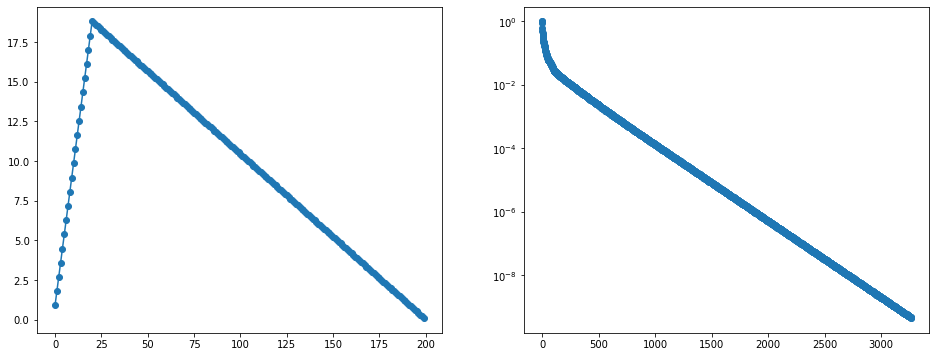

In [4]:
fig, ax = subplots(1,2, figsize=(16,6))

ax[0].plot(x_laplace[-1], 'o-')
ax[1].semilogy(r_laplace, 'o--')

## Implement `GMRES` as a stencil operator

The `mk_laplace_1d` function returns a lambda experssion implementation of the laplace operator specific to the problem -- that:
1. Implements boundary conditions
2. Applies the discrete laplace operator to the input datat

`mk_laplace_1d` takes arguments that define the boundary conditions. The only mandatory argument is `N` -- the size of the grid, the boundary conditions are applied to points outside the grid.

* The returned function (operator) takes one argument -- an array of dimension N, and applies the laplace operator (+boundary conditions)

In [5]:
A_op = mk_laplace_1d(N)

Test the new operator -- when `GMRES`, and `resid`, detect non-matrix type inputs it assumes the operator is a lambda function with 1 argument

In [6]:
e = 0
nmax_iter = 50
restart   = 64
# Run GMRES
x_laplace_op = GMRES(A_op, b, x0, e, nmax_iter, restart=restart, debug=True)
r_laplace_op = resid(A_op, x_laplace_op, b)

Check the solution (left) and convergence rate (right) -- and compare to the matrix implementation (previous section)

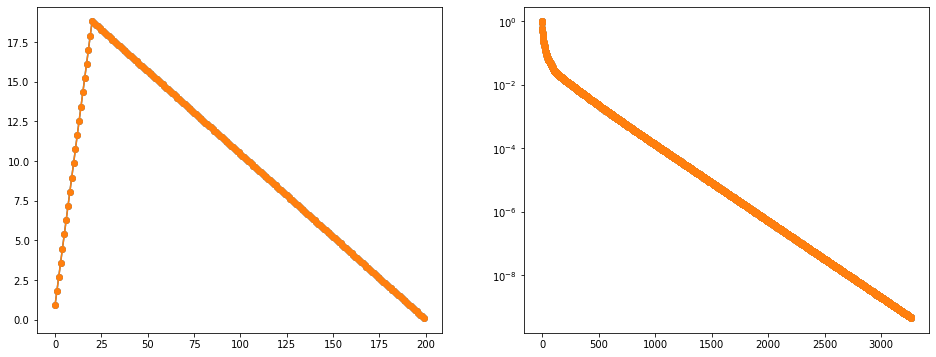

In [7]:
fig, ax = subplots(1,2, figsize=(16,6))

ax[0].plot(x_laplace_op[-1], 'o-')
ax[0].plot(x_laplace   [-1], 'o-')
ax[1].semilogy(r_laplace_op, 'o--')
ax[1].semilogy(r_laplace   , 'o--')

## Test Boundary Conditions

In [8]:
A_op = mk_laplace_1d(N, bc="dirichlet", lval=0, rval=2.5)

In [9]:
e = 0
nmax_iter = 50
restart   = 400
# Run GMRES
x_laplace_op_2 = GMRES(A_op, b, x0, e, nmax_iter, restart=restart, debug=True)
r_laplace_op_2 = resid(A_op, x_laplace_op_2, b)

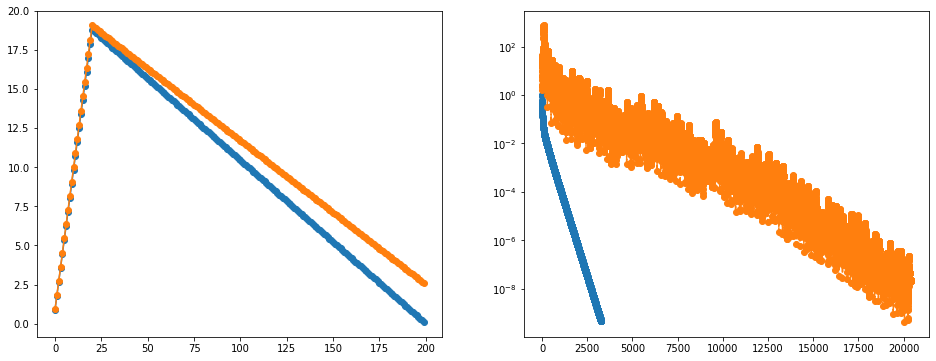

In [10]:
fig, ax = subplots(1,2, figsize=(16,6))

ax[0].plot(x_laplace_op[-1], 'o-')
ax[0].plot(x_laplace_op_2[-1], 'o-')
ax[1].semilogy(r_laplace_op, 'o--')
ax[1].semilogy(r_laplace_op_2, 'o--')